In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
tf.test.is_built_with_cuda()

True

In [2]:
train = pd.read_csv("train.csv",header=None, index_col=None)
train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [3]:
test = pd.read_csv("test.csv",header=None, index_col=None)
test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
types = ["Non Ectopic beats (Normal beats)",'Supraventrical ectopic beats',"Ventricular ectopic beats",'Fusion beats','Unknown beats']

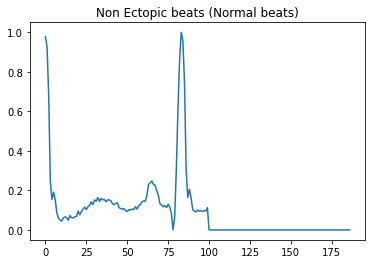

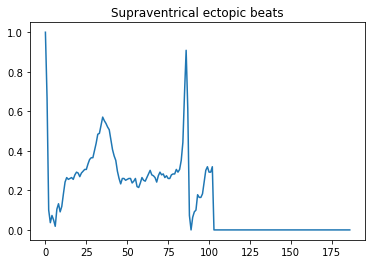

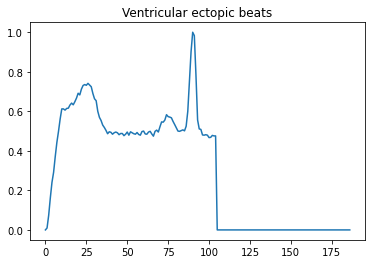

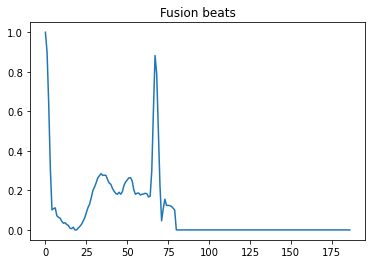

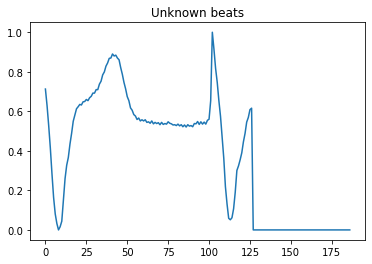

In [5]:
cond = train[187].unique()
for a in cond:
    train1 = train[train[187] == a].head(1)
    aa = train1.loc[:,0:186].to_numpy()
    xx = np.arange(0,187)
    plt.plot(xx,aa[0])
    plt.title(types[int(a)])
    plt.show()

In [15]:
X_train = train.drop([187], axis = 'columns')
y_train = train[187]

In [16]:
y_train.astype('int64')

0        0
1        0
2        0
3        0
4        0
        ..
87549    4
87550    4
87551    4
87552    4
87553    4
Name: 187, Length: 87554, dtype: int64

In [29]:
model = keras.Sequential([
    keras.layers.Dense(187,input_shape = (187,),activation = 'relu'),
    keras.layers.Dense(200,activation = 'relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(2500,activation = 'relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(5000,activation = 'relu'),
    keras.layers.Dense(5,activation = 'softmax')
])
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
             )
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
2737/2737 [==============================] - 20s 7ms/step - loss: 0.2450 - accuracy: 0.9334
Epoch 2/10
2737/2737 [==============================] - 19s 7ms/step - loss: 0.1623 - accuracy: 0.9554
Epoch 3/10
2737/2737 [==============================] - 19s 7ms/step - loss: 0.1404 - accuracy: 0.9625
Epoch 4/10
2737/2737 [==============================] - 20s 7ms/step - loss: 0.1279 - accuracy: 0.9658
Epoch 5/10
2737/2737 [==============================] - 20s 7ms/step - loss: 0.1200 - accuracy: 0.9673
Epoch 6/10
2737/2737 [==============================] - 20s 7ms/step - loss: 0.1121 - accuracy: 0.9690
Epoch 7/10
2737/2737 [==============================] - 20s 7ms/step - loss: 0.1065 - accuracy: 0.9707
Epoch 8/10
2737/2737 [==============================] - 20s 7ms/step - loss: 0.1025 - accuracy: 0.9717
Epoch 9/10
2737/2737 [==============================] - 20s 7ms/step - loss: 0.0999 - accuracy: 0.9722
Epoch 10/10
2737/2737 [==============================] - 20s 7ms/step - l

In [18]:
y_test = test[187]
y_test.astype('int64')

0        0
1        0
2        0
3        0
4        0
        ..
21887    4
21888    4
21889    4
21890    4
21891    4
Name: 187, Length: 21892, dtype: int64

In [19]:
X_test = test.drop([187], axis = 'columns')

In [20]:
yp = model.predict(X_test)

In [21]:
ypred = []
for i in range(len(yp)):
    ypred.append(np.argmax(yp[i]))

Text(69.0, 0.5, 'Truth')

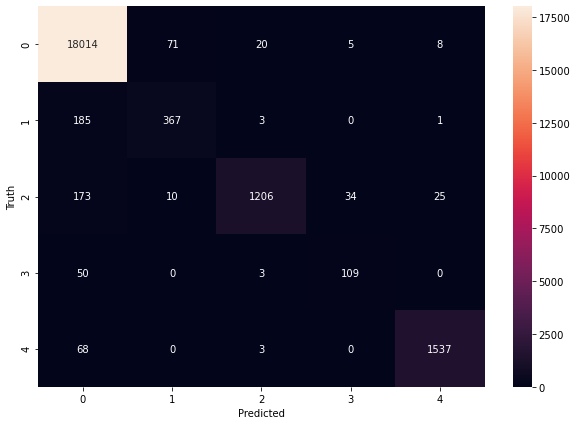

In [22]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=ypred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     18118
         1.0       0.82      0.66      0.73       556
         2.0       0.98      0.83      0.90      1448
         3.0       0.74      0.67      0.70       162
         4.0       0.98      0.96      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.90      0.82      0.86     21892
weighted avg       0.97      0.97      0.97     21892



In [24]:
import os
if os.path.isfile('./ECG_detector_model.h5') is False:
    model.save('./ECG_detector_model.h5')

In [26]:
from tensorflow.keras.models import load_model
new_model = load_model('./ECG_detector_model.h5')

In [27]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 187)               35156     
_________________________________________________________________
dense_16 (Dense)             (None, 200)               37600     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1000)              201000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 2500)              2502500   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2500)             